# Análisis de Enfermedades Cardíacas 
En este proyecto se utilizo el siguiente dataset de kaggle (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset), que trata sobre si una persona sufre de una enfermedad cardíaca o no.

#### Importar librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#### Importar dataset
Ahora que tenemos todas las librerias que necesitaremos, importamos el dataset. Los datos se almacenan en heart.csv. Usaremos el método pandas read_csv para leer el dataset.

In [3]:
# Carga del Dataset
df = pd.read_csv("./dataset/heart.csv")

#### Verificación de datos

In [4]:
# Verificación de los datos cargados
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Verificación de los tipos de datos de las columnas
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
# Verificación de datos faltantes en cada columna
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# METRICAS BÁSICAS
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


La escala de cada columna es diferente y bastante variada también. Mientras que el máximo para la edad alcanza los 77 años, el máximo de chol (colestoral sérico) es 564.

### Análisis de variables específicas:

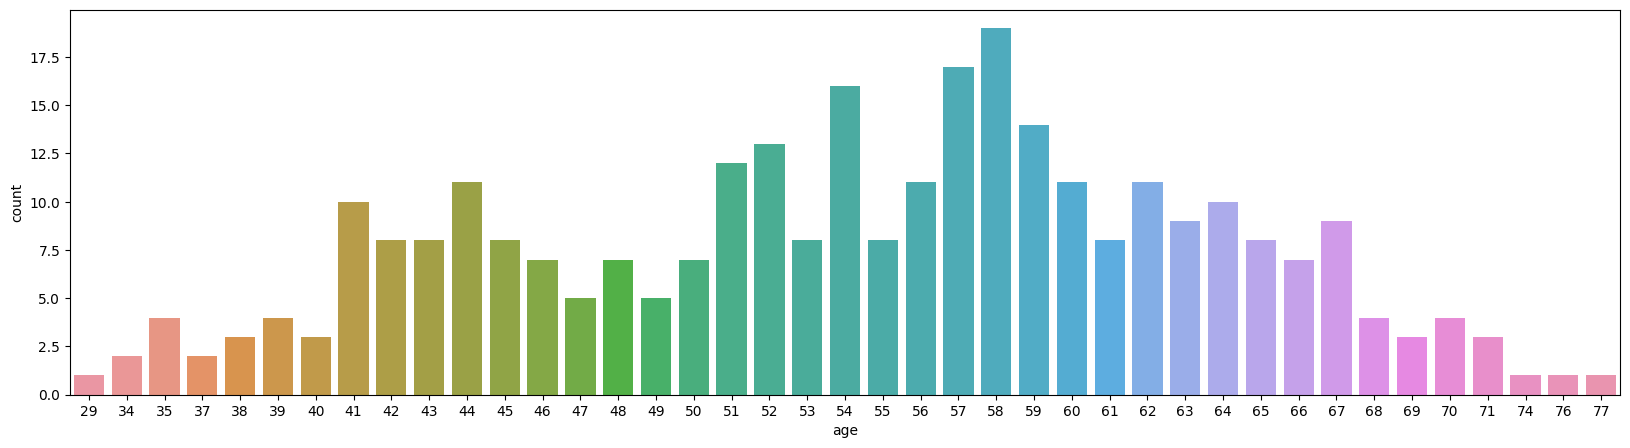

In [8]:
# DISTRIBUCIÓN DE LA EDAD
edad_dist = (20, 5)
edad_dist, ax2 = plt.subplots(figsize=edad_dist)
ax2 = sns.countplot(x=df['age'])
plt.show()

La edad en el dataset va de 28 a 77, siendo el grupo de 50 a 60 el rango etáreo que más cantidad de personas contiene.

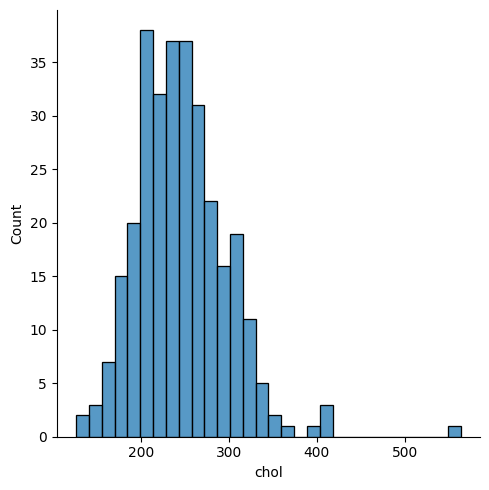

In [9]:
# DISTRIBUCIÓN DEL COLESTEROL
sns.displot(x=df['chol'], bins=30)
plt.show()

Se ve que hay muchísimos registros con valor igual a 0 para esta variable. Habría que analizar si hay pacientes con colesterol igual a 0 o si es un error del dataset.

In [10]:
# CANTIDAD DE PERSONAS QUE PRESENTAN COLESTEROL 0
colesterol_0 = df[df['chol']==0]
print("La cantidad de pacientes que presentan niveles de colesterol 0 son:", colesterol_0.chol.count())

La cantidad de pacientes que presentan niveles de colesterol 0 son: 0


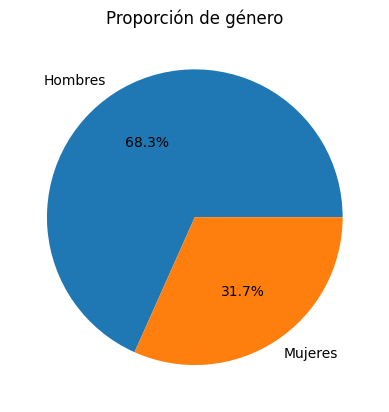

In [11]:
# PROPORCIÓN DEL GÉNERO
gender_counts = df['sex'].value_counts()
plt.pie(gender_counts, labels=['Hombres', 'Mujeres'], autopct='%1.1f%%')
plt.title('Proporción de género')
plt.show()

De los pacientes a quienes se les realizó el estudio, el 31.7%, es decir, 96 pacientes eran mujeres, y el 68.3%, correspondiente a 207 pacientes, eran hombres.

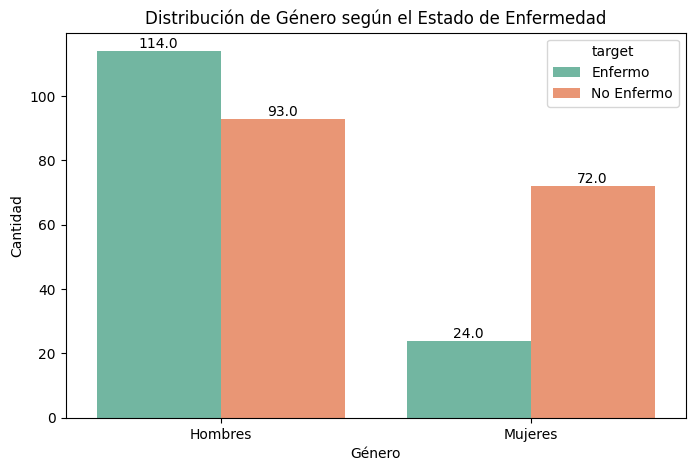

In [12]:
# DISTRIBUCIÓN DE GÉNERO ENTRE PACIENTES CON ENFERMEDAD Y SIN ENFERMEDAD

# Reemplazar los valores de la columna 'Sex' con etiquetas personalizadas
df['sex'] = df['sex'].replace({0: 'Mujeres', 1: 'Hombres'})

# Calcular la distribución de género para cada valor de target
gender_target_distribution = df.groupby(['sex', 'target']).size().reset_index(name='Count')

# Mapear los valores de target a las categorías "Enfermo" y "No Enfermo"
gender_target_distribution['target'] = gender_target_distribution['target'].map({0: 'Enfermo', 1: 'No Enfermo'})

# Crear el gráfico de barras para la distribución de género
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='Count', hue='target', data=gender_target_distribution, palette='Set2')

# Agregar etiquetas a las barras
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f"{height}", (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Configurar título y etiquetas de ejes
plt.title('Distribución de Género según el Estado de Enfermedad')
plt.xlabel('Género')
plt.ylabel('Cantidad')

plt.show()


Podemos observar que entre los pacientes con enfermedad, los hombres tienen una mayor proporción en comparación con las mujeres.
Es decir, según el conjunto de datos analizado, hay una mayor prevalencia de enfermedad cardíaca entre los hombres en comparación con las mujeres.